**Importing the Libraries**

In [51]:
#Importing the Libraries
import pandas as PD
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model

**Getting to Visualising the Stock Market Prediction Data**

In [52]:
#Get the Dataset
df=PD.read_csv('/content/Date,Open,High,Low,Last,Close,Total.txt')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [53]:
print("Dataframe Shape: ", df. shape)
print('Null Value Present: ', df.isnull().values.any())


Dataframe Shape:  (2035, 8)
Null Value Present:  False


**Plotting the True Close Value**

<Axes: >

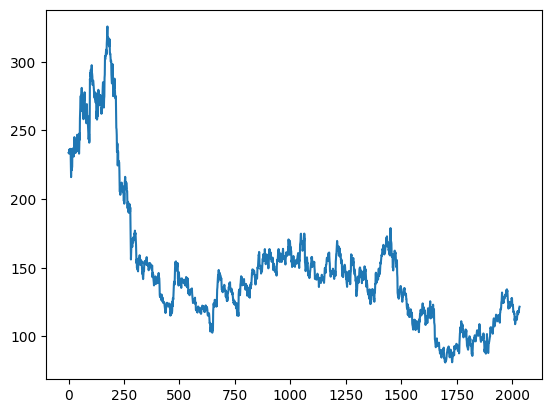

In [54]:
#Plot the True Close Value
df['Close'].plot()

**Setting the Target Variable and Selecting the Features**

In [55]:
#Set Target Variable
output_var = PD.DataFrame(df['Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Total Trade Quantity']

**Scaling**

In [56]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= PD.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Total Trade Quantity
0,0.620235,0.622688,0.621560,0.103951
1,0.622263,0.626144,0.625285,0.173002
2,0.644363,0.639154,0.631078,0.075513
3,0.617194,0.625940,0.629009,0.079233
4,0.618208,0.635902,0.623836,0.116080


**Creating a Training Set and a Test Set for Stock Market Prediction**

In [57]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

**Data Processing For LSTM**

In [58]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

**Building the LSTM Model for Stock Market Prediction**

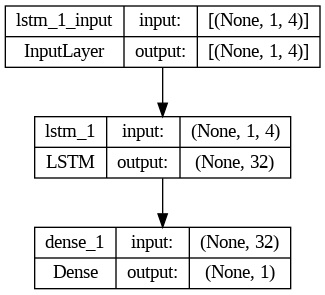

In [59]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

**Training the Stock Market Prediction Model**

**Finally, we use the fit function to train the LSTM model created above on the training data for 100 epochs with a batch size of 8.**

In [60]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
232/232 [==============================] - 2s 3ms/step - loss: 25816.7500
Epoch 2/100
232/232 [==============================] - 1s 3ms/step - loss: 25026.7188
Epoch 3/100
232/232 [==============================] - 1s 3ms/step - loss: 22566.3105
Epoch 4/100
232/232 [==============================] - 1s 5ms/step - loss: 18676.1543
Epoch 5/100
232/232 [==============================] - 1s 5ms/step - loss: 14154.6074
Epoch 6/100
232/232 [==============================] - 1s 4ms/step - loss: 9588.7256
Epoch 7/100
232/232 [==============================] - 1s 3ms/step - loss: 5854.3594
Epoch 8/100
232/232 [==============================] - 1s 3ms/step - loss: 3188.6589
Epoch 9/100
232/232 [==============================] - 1s 3ms/step - loss: 1534.9210
Epoch 10/100
232/232 [==============================] - 1s 3ms/step - loss: 658.7281
Epoch 11/100
232/232 [==============================] - 1s 3ms/step - loss: 268.6098
Epoch 12/100
232/232 [==============================] - 1s 3

**Making the LSTM Prediction**

In [61]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

6/6 [==============================] - 0s 3ms/step


**Comparing Predicted vs True Close Value – LSTM**

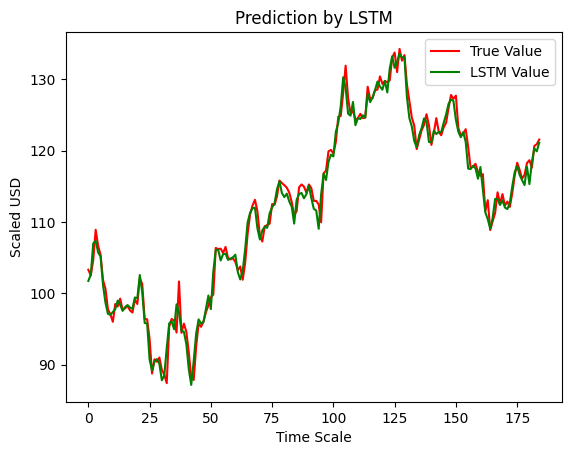

In [63]:
#Predicted vs True Close Value – LSTM
plt.plot(y_test, label='True Value' , color='red')
plt.plot(y_pred, label='LSTM Value', color='green')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

***The graph above demonstrates that the extremely basic single LSTM network model created above detects some patterns.***